In [1]:
import pandas
import configparser
import psycopg2

In [2]:
config=configparser.ConfigParser()
config.read('config.ini')

db=config['myaws']['db']
host=config['myaws']['host']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [4]:
conn=psycopg2.connect(
                host=host,
                user=user,
                password=pwd,
                dbname=db)

## Q1

In [5]:
sql="select * from student"

In [6]:
df=pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_8952/2417332674.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql,conn)


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s3,IA


## Q2

In [9]:
sql="""
select professor.p_name,
course.c_name
from professor
inner join course
on professor.p_email = course.p_email
"""

In [10]:
df=pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_8952/2417332674.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql,conn)


,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter


## Q3

In [11]:
sql="""
select c_number, count(*) as num_student
from enroll
group by c_number
order by num_student desc
"""

/tmp/ipykernel_8952/2130638689.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql,conn)


<Axes: xlabel='c_number'>

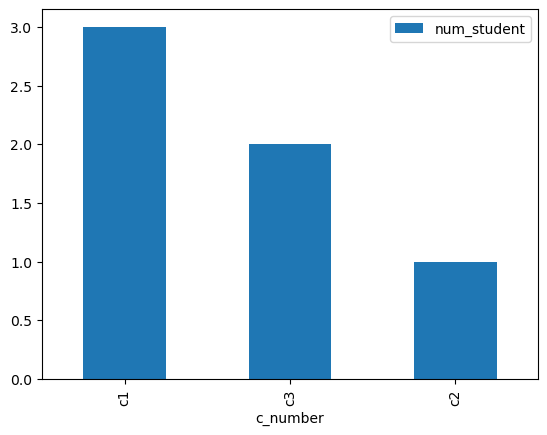

In [12]:
df=pandas.read_sql_query(sql,conn)
df.plot.bar(x='c_number',y='num_student')

## Q4

In [17]:
sql= """SELECT professor.p_name, 
	COUNT(course.c_name) as number_of_courses
FROM professor
inner join course
on professor.p_email=course.p_email
GROUP BY professor.p_name
ORDER BY number_of_courses DESC"""

/tmp/ipykernel_8952/2746314042.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql,conn)


<Axes: xlabel='p_name'>

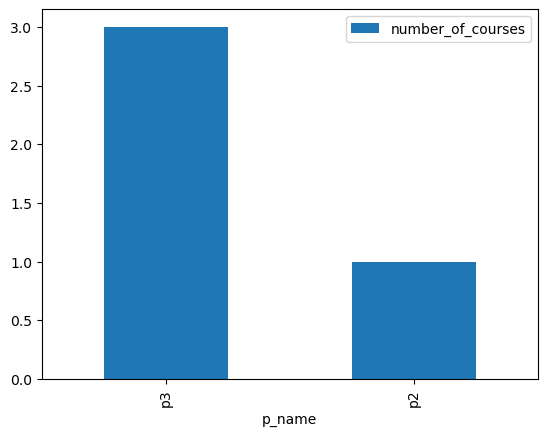

In [18]:
df=pandas.read_sql_query(sql,conn)
df.plot.bar(x='p_name',y='number_of_courses')

## Q5

In [19]:
cur = conn.cursor()

In [20]:
sql= """
insert into professor(p_email,p_name,office)
values('p4@jmu.edu','p4','o4')"""

In [21]:
cur.execute(sql)

In [22]:
conn.commit()

In [23]:
df=pandas.read_sql_query('select * from professor', conn)
df[:]

/tmp/ipykernel_8952/3494731394.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query('select * from professor', conn)


,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [24]:
sql="""
insert into course(c_number,c_name,room,p_email)
values('c5','linkedin','re','p4@jmu.edu')"""

In [25]:
cur.execute(sql)

In [26]:
conn.commit()

In [27]:
df=pandas.read_sql_query ('select * from course', conn)
df[:]

/tmp/ipykernel_8952/3017884563.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query ('select * from course', conn)


,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
4,c5,linkedin,re,p4@jmu.edu


## Q6